# Situación problema

## Julieta Zambrano A01365637

## 1. Lo primero es importar las librerías a utilizar

In [51]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from sklearn import linear_model
#import statsmodels.formula.api as smf

## 2. Se descarga la base de datos a utilizar

In [53]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [54]:
df = pd.read_excel('Libro2.xlsx',
                   engine = 'openpyxl'
                  )
df

,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_365,calculated_host_listings_count,reviews_per_month
0,Roma Norte,Apartment,Entire home/apt,5,2.0,2,3,Real Bed,3503,3,338,3,2.77
1,Centro HistÃ³rico,Apartment,Entire home/apt,5,2.0,2,2,Real Bed,3923,3,61,3,2.64
2,Polanco,Apartment,Entire home/apt,2,1.5,1,1,Real Bed,500,3,0,3,0.12
3,Polanco,Apartment,Entire home/apt,5,2.5,3,3,Real Bed,3600,3,0,3,0.05
4,Polanco,Apartment,Private room,1,0.0,1,1,Real Bed,401,3,365,2,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Roma Norte,Loft,Entire home/apt,2,1.5,1,1,Real Bed,909,2,80,1,3.64
196,Zona Rosa,Loft,Entire home/apt,2,1.5,1,1,Real Bed,1500,2,0,1,0.70
197,Roma Norte,Loft,Private room,2,1.5,1,1,Real Bed,498,1,365,2,3.10
198,Centro HistÃ³rico,Loft,Private room,2,2.0,1,1,Real Bed,542,1,364,1,1.03


Escogí una base de datos de Airbnb en donde vienen datos de departamentos, casas, hoteles y loft que se pueden rentar en la Ciudad de México.

## 3. Se obtiene la información de la base de datos

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   200 non-null    object 
 1   property_type                   200 non-null    object 
 2   room_type                       200 non-null    object 
 3   accommodates                    200 non-null    int64  
 4   bathrooms                       200 non-null    float64
 5   bedrooms                        200 non-null    int64  
 6   beds                            200 non-null    int64  
 7   bed_type                        200 non-null    object 
 8   price                           200 non-null    int64  
 9   minimum_nights                  200 non-null    int64  
 10  availability_365                200 non-null    int64  
 11  calculated_host_listings_count  200 non-null    int64  
 12  reviews_per_month               200 

### Conclusiones 
La base de datos cuenta con 200 registros y 13 columnas, de las cuales 2 son float, 7 son int y 4 son object. Es muy importante analizar y saber el tipo de variables con las que se cuenta para poder realizar con exito el análisis de regresión.

## 4. ¿Cuál es la variable de interés? 

Al analizar la base de datos decidí que la variable de interés sera price (describe el precio de un Airbnb por noche), ya que con este proyecto se espera diseñar un modelo de regresión simple en el que se pueda ingresar los datos de un Airbnb y pronosticar su precio por noche.

## 5. ¿Qué tipo de distribución sigue la variable de interés ('price')?

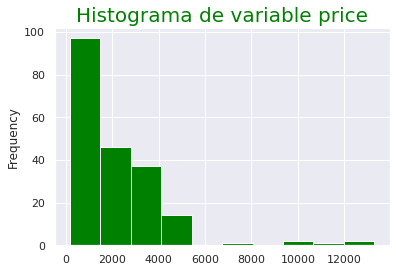

In [56]:
df['price'].plot(kind = 'hist', color= "green")
plt.title('Histograma de variable price', fontsize = 20, color = "green") 
plt.show()

## 6. Analizar la media, la desviación estandar y los percentiles de las columnas numéricas.

In [57]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,calculated_host_listings_count,reviews_per_month
count,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,3.210000,1.627500,1.52000,1.745000,2080.75000,6.200000,228.225000,5.445000,1.234250
std,2.313582,0.856541,1.19446,1.445831,2098.45721,11.887242,138.435277,7.152817,1.324609
min,1.000000,0.000000,0.00000,0.000000,181.00000,1.000000,0.000000,1.000000,0.020000
25%,2.000000,1.000000,1.00000,1.000000,499.50000,2.000000,90.000000,2.000000,0.340000
50%,2.000000,1.500000,1.00000,1.000000,1500.00000,3.000000,270.000000,3.000000,0.705000
75%,4.000000,2.000000,2.00000,2.000000,2974.00000,4.250000,364.000000,6.000000,1.785000
max,15.000000,6.500000,7.00000,11.000000,13294.00000,120.000000,365.000000,41.000000,8.360000


### Conclusiones 
Como podemos ver en los resultados pasados nuestra variable de interes (price) esta tiene un minimo de 181 pesos y un maximo de 13,294 pesos por lo que esperamos que... 

## 7. ¿Cuál es la variable de mayor correlación con la variable de interés (price)?

In [58]:
variables = ['neighbourhood', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'minimum_nights',
       'availability_365', 'calculated_host_listings_count',
       'reviews_per_month']
df = df[variables].dropna() 
df[variables].corr()

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,calculated_host_listings_count,reviews_per_month
accommodates,1.000000,0.752231,0.749474,0.905426,0.972455,-0.041367,-0.063174,0.037748,0.080005
bathrooms,0.752231,1.000000,0.649517,0.724312,0.704977,0.019199,0.045865,-0.018330,0.039714
bedrooms,0.749474,0.649517,1.000000,0.772601,0.724498,-0.013732,-0.098171,-0.028397,-0.091254
beds,0.905426,0.724312,0.772601,1.000000,0.891613,-0.048477,-0.072194,0.011999,0.013609
price,0.972455,0.704977,0.724498,0.891613,1.000000,-0.050461,-0.076643,0.033813,0.056343
minimum_nights,-0.041367,0.019199,-0.013732,-0.048477,-0.050461,1.000000,-0.029501,0.045874,-0.087386
availability_365,-0.063174,0.045865,-0.098171,-0.072194,-0.076643,-0.029501,1.000000,-0.050373,0.049519
calculated_host_listings_count,0.037748,-0.018330,-0.028397,0.011999,0.033813,0.045874,-0.050373,1.000000,0.168840
reviews_per_month,0.080005,0.039714,-0.091254,0.013609,0.056343,-0.087386,0.049519,0.168840,1.000000


### Conclusiones 
En este caso la variable con mayor correlación con la variable de interés es accommodates (número de personas que caben en el Airbnb).

## 8. ¿Cómo es la correlación existente entre la variable independiente 'accommodates' y la variable dependiente 'price'?

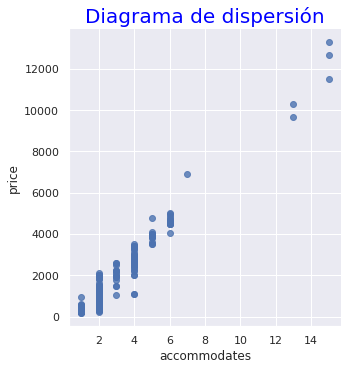

In [59]:
sns.lmplot(x = 'accommodates', y = 'price', data = df,fit_reg = False,) 
plt.title('Diagrama de dispersión', fontsize = 20, color = "blue") 
plt.show()

### Conclusiones 
En el diagrama de dispersión se puede ver que cuando la variable accommodates aumenta el precio del airbnb también aumenta esto quiere decir que se tiene una correlación positiva.

## 9. ¿Existen valores atípicos en la variable independiente 'accommodates'?

Text(0.5, 1.0, 'Datos atípicos de accommodates')

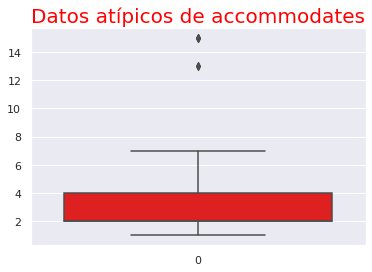

In [60]:
sns.boxplot(data = df.loc[:,'accommodates'], color = "red")
plt.title('Datos atípicos de accommodates', fontsize = 20, color = "red")

### Conclusiones 
Cabe mencionar que es muy importante saber si existen datos atipicos para mantener la confiabilidad del pronóstico.
Como podemos ver en el boxplot de la variable accommodates existen datos atípicos, estos datos fueron checados y se determinó que no se borrarían ya que no se considero que estuvieran incorrectos.

## 10. ¿Qué tan bueno es el análisis de regresión para 'price' en función de 'accommodates'?, ¿Qué indica la R- cuadrada?, ¿y los P-value de los parámetros B0 y B1?, ¿el Durbir-Watson?

In [61]:
model = sm.OLS.from_formula('price~accommodates', data=df)
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     3446.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          3.43e-127
Time:                        02:28:51   Log-Likelihood:                -1521.8
No. Observations:                 200   AIC:                             3048.
Df Residuals:                     198   BIC:                             3054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -750.5747     59.400    -12.636      0.000    -867.713    -633.437
accommodates   882.0326     15.025     58.705      0.000     852.403     911.662
==============================================================================
Omnibus:                        4.572   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.648
Skew:                          -0.228   Prob(JB):                       0.0979
Kurtosis:                       3.592   Cond. No.                         7.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusiones 
La R-cuadrada tiene un valor de 0.946 lo cual indica que 
Con respectos a los valores de P-value
Hablando del valor del Durbin-Watson este cuenta

## 11. Gráfica de dispersión de las observaciones VS la gráfica de regresión propuesta por el modelo

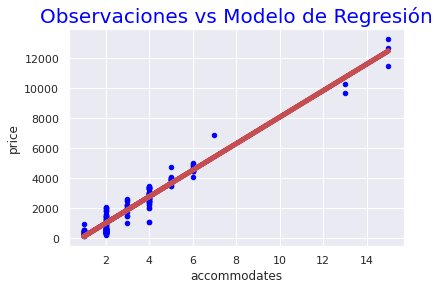

In [62]:
lm = linear_model.LinearRegression() 
X = pd.DataFrame(df['accommodates']) 
Y = pd.DataFrame(df['price'])

model_lm = lm.fit(X,Y) 
model_lm

df.plot(kind='scatter',
    x = 'accommodates',
    y = 'price', 
    color = 'blue')

plt.plot(X,
         model_lm.predict(X),
         linewidth = 5,
         color = 'r')

plt.title('Observaciones vs Modelo de Regresión', fontsize = 20, color = 'blue') 
plt.show()

### Conclusiones 
Finalmente se grafica de nuevo la Scatter Plot con el pronóstico de regresión y